# **Universidad EAN**
##**Machine Learning 1**
##**Guía 3 Actividad 1**

---
# **Proyecto 3 – Una exploración profunda a la base de nivel de obesidad**
---

Presentado por
###**María Camila Tarazona Nieto**
###**Leyla Rocío Becerra Barajas**

# **Introducción**

El problema se enfoca en la estimación de niveles de obesidad basados en hábitos alimenticios y condiciones físicas. Utilizando el conjunto de datos proporcionado en el enlace, se pretende comprender cómo los hábitos alimenticios y la actividad física influyen en los niveles de obesidad de las personas. Las características incluyen variables relacionadas con la alimentación, la actividad física, el índice de masa corporal (IMC) y la clasificación de obesidad. El objetivo es desarrollar modelos predictivos que puedan estimar con precisión los niveles de obesidad basados en estas características, lo que podría ser útil para la prevención y el tratamiento de la obesidad.







# **Librerías**
---
Instalación de paquetes, importar las librerías necesarias y cargar la base de datos

In [1]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report,RocCurveDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

---
# **Versiones**
---
Este documento fue realizado con las siguientes versiones:

- Python 3.10.12
- Pandas 1.5.3
- Matplotlib 3.8

In [2]:
#Versiones actuales
!python --version
print('NumPy', np.__version__)
print('Pandas', pd.__version__)

Python 3.10.12
NumPy 1.25.2
Pandas 2.0.3


---
# **Instalaciones**
---
Se instala el paquete de [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/), con el fin de tener acceso directo a la base de de datos "[Estimation of Obesity Levels Based On Eating Habits and Physical Condition](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition)", la cual forma parte del informe "[Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico](https://www.semanticscholar.org/paper/Dataset-for-estimation-of-obesity-levels-based-on-Palechor-Manotas/35b40bacd2ffa9370885b7a3004d88995fd1d011)"

In [3]:
pip install ucimlrepo

---
# **Base de datos**
---

## **Carga de Base de datos**

Inicialmente se carga la lista de datasets, para identificar y seleccionar el que corresponde a la base de datos de Obesidad, que es id=544.

In [4]:
from ucimlrepo import fetch_ucirepo, list_available_datasets

In [5]:
# Selección de la base de datos y carga de sus datos en una variable
heart_disease = fetch_ucirepo(id=544)
heart_disease

{'data': {'ids': None,
  'features':       Gender        Age    Height      Weight family_history_with_overweight  \
  0     Female  21.000000  1.620000   64.000000                            yes   
  1     Female  21.000000  1.520000   56.000000                            yes   
  2       Male  23.000000  1.800000   77.000000                            yes   
  3       Male  27.000000  1.800000   87.000000                             no   
  4       Male  22.000000  1.780000   89.800000                             no   
  ...      ...        ...       ...         ...                            ...   
  2106  Female  20.976842  1.710730  131.408528                            yes   
  2107  Female  21.982942  1.748584  133.742943                            yes   
  2108  Female  22.524036  1.752206  133.689352                            yes   
  2109  Female  24.361936  1.739450  133.346641                            yes   
  2110  Female  23.664709  1.738836  133.472641                

In [6]:
# Exploración inicial de los datos - metadatos de la información
heart_disease.metadata

{'uci_id': 544,
 'name': 'Estimation of Obesity Levels Based On Eating Habits and Physical Condition ',
 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition',
 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv',
 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ',
 'area': 'Health and Medicine',
 'tasks': ['Classification', 'Regression', 'Clustering'],
 'characteristics': ['Multivariate'],
 'num_instances': 2111,
 'num_features': 16,
 'feature_types': ['Integer'],
 'demographics': ['Gender', 'Age'],
 'target_col': ['NObeyesdad'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 2019,
 'last_updated': 'Mon Feb 26 2024',
 'dataset_doi': '10.24432/C5H31Z',
 'creators': [],
 'intro_paper': 

In [7]:
heart_disease.data

{'ids': None,
 'features':       Gender        Age    Height      Weight family_history_with_overweight  \
 0     Female  21.000000  1.620000   64.000000                            yes   
 1     Female  21.000000  1.520000   56.000000                            yes   
 2       Male  23.000000  1.800000   77.000000                            yes   
 3       Male  27.000000  1.800000   87.000000                             no   
 4       Male  22.000000  1.780000   89.800000                             no   
 ...      ...        ...       ...         ...                            ...   
 2106  Female  20.976842  1.710730  131.408528                            yes   
 2107  Female  21.982942  1.748584  133.742943                            yes   
 2108  Female  22.524036  1.752206  133.689352                            yes   
 2109  Female  24.361936  1.739450  133.346641                            yes   
 2110  Female  23.664709  1.738836  133.472641                            yes   
 


## **Exploración de la Base de datos**

Se exploran los datos de la base de datos para familiarizarse con la información, tipos de datos y cantidad de registros

In [8]:
# Exploración inicial de los datos - variables disponibles
heart_disease.variables

,name,role,type,demographic,description,units,missing_values
0,Gender,Feature,Categorical,Gender,None,None,no
1,Age,Feature,Continuous,Age,None,None,no
2,Height,Feature,Continuous,None,None,None,no
3,Weight,Feature,Continuous,None,None,None,no
4,family_history_with_overweight,Feature,Binary,None,Has a family member suffered or suffers from o...,None,no
5,FAVC,Feature,Binary,None,Do you eat high caloric food frequently?,None,no
6,FCVC,Feature,Integer,None,Do you usually eat vegetables in your meals?,None,no
7,NCP,Feature,Continuous,None,How many main meals do you have daily?,None,no
8,CAEC,Feature,Categorical,None,Do you eat any food between meals?,None,no
9,SMOKE,Feature,Binary,None,Do you smoke?,None,no


In [9]:
# Exploración inicial de los datos - características
heart_disease.data.features

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation


In [10]:
heart_disease.data.targets

,NObeyesdad
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Overweight_Level_I
4,Overweight_Level_II
...,...
2106,Obesity_Type_III
2107,Obesity_Type_III
2108,Obesity_Type_III
2109,Obesity_Type_III


---
# **Análisis exploratorio de los datos**
---

## **Uso de un dataframe (pandas)**

Se crea una estructura de datos "dataframe" de la librería [pandas](https://https://pandas.pydata.org/) la cual facilita el análisis de los datos, puesto que  ya cuenta con funciones implementadas para ello.

In [11]:
df=pd.DataFrame(heart_disease.data.features, columns=heart_disease.data.headers)

In [12]:
df.loc[:,'Obesity']=heart_disease.data.targets

In [13]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,NaN,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,NaN,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,NaN,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,NaN,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,NaN,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,NaN,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,NaN,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,NaN,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,NaN,Obesity_Type_III


##**Identificación de variables**

Se explora el archivo revisando el nombre, el tipo de información y cantidad de registros con valores nulos para cada variable.

In [14]:
# Exploración inicial del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

##**Estadísticas principales**

Se explora el archivo revisando el nombre, el tipo de información y cantidad de registros con valores nulos para cada variable.

In [15]:
# Exploración inicial de los datos - valores estadísticos totales calculados a las variables numéricas
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,0.0
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866,NaN
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927,NaN
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,NaN
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000,NaN
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350,NaN
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000,NaN
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,NaN


## **Variables numéricas**

###**Age**

Es una variable numérica que almacena la edad de la persona.  

In [16]:
#Estadísticas de la variable
df['Age'].describe()

count    2111.000000
mean       24.312600
std         6.345968
min        14.000000
25%        19.947192
50%        22.777890
75%        26.000000
max        61.000000
Name: Age, dtype: float64

<Axes: >

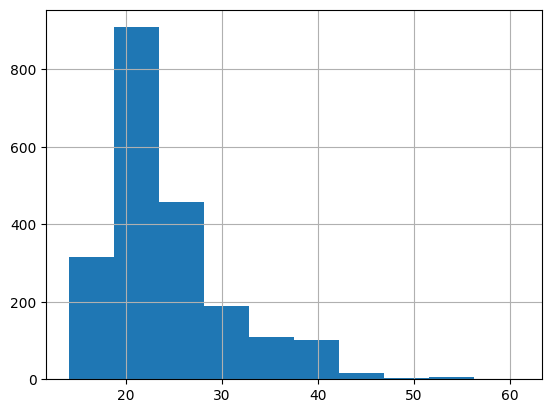

In [17]:
df['Age'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x79d13ab24d90>,
 'caps': [<matplotlib.lines.Line2D at 0x79d13ab252d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79d13aaff8e0>],
 'medians': [<matplotlib.lines.Line2D at 0x79d13ab25810>],
 'fliers': [<matplotlib.lines.Line2D at 0x79d13ab25ab0>],
 'means': []}

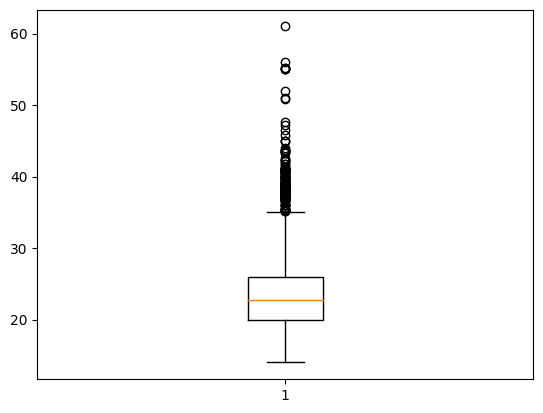

In [18]:
plt.boxplot(x=df['Age'])

###**Height**

Es una variable numérica que almacena la altura de la persona.  

In [19]:
#Estadísticas de la variable
df['Height'].describe()

count    2111.000000
mean        1.701677
std         0.093305
min         1.450000
25%         1.630000
50%         1.700499
75%         1.768464
max         1.980000
Name: Height, dtype: float64

<Axes: >

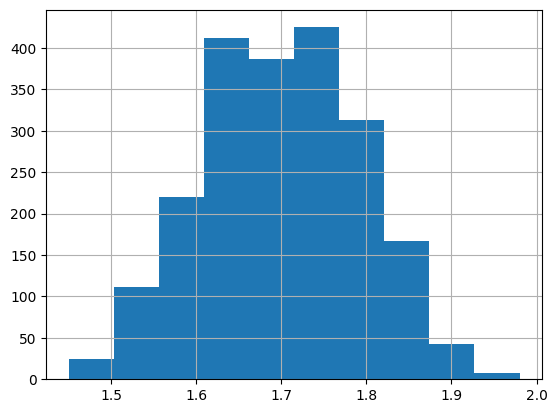

In [20]:
df['Height'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x79d13aa270a0>,
 'caps': [<matplotlib.lines.Line2D at 0x79d13aa275e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79d13aa263e0>],
 'medians': [<matplotlib.lines.Line2D at 0x79d13aa27b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x79d13aa27dc0>],
 'means': []}

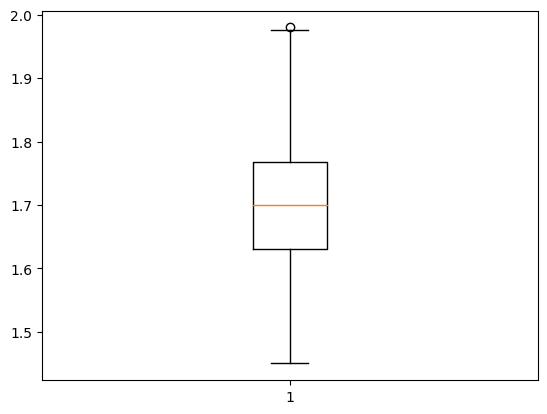

In [21]:
plt.boxplot(x=df['Height'])

###**Weight**

Es una variable numérica que almacena el peso de la persona.  

In [22]:
#Estadísticas de la variable
df['Weight'].describe()

count    2111.000000
mean       86.586058
std        26.191172
min        39.000000
25%        65.473343
50%        83.000000
75%       107.430682
max       173.000000
Name: Weight, dtype: float64

<Axes: >

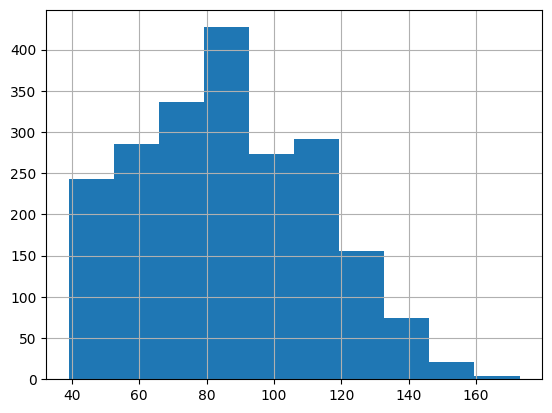

In [23]:
df['Weight'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x79d13a942d10>,
 'caps': [<matplotlib.lines.Line2D at 0x79d13a943250>,
 'boxes': [<matplotlib.lines.Line2D at 0x79d13a942a70>],
 'medians': [<matplotlib.lines.Line2D at 0x79d13a943790>],
 'fliers': [<matplotlib.lines.Line2D at 0x79d13a943a30>],
 'means': []}

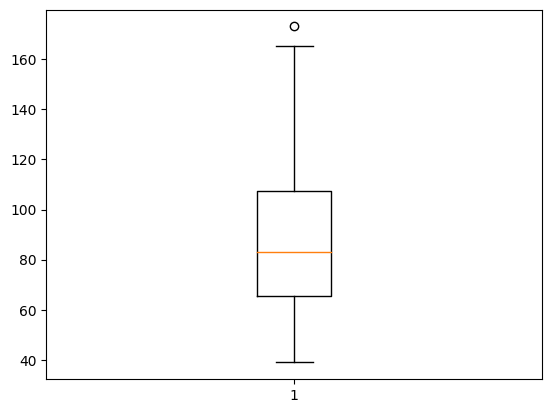

In [24]:
plt.boxplot(x=df['Weight'])

###**FCVC**

Es una variable numérica entera que determina el consumo frecuente de vegetales en los alimentos.  

*Do you usually eat vegetables in your meals?*


In [25]:
#Estadísticas de la variable
df['FCVC'].describe()

count    2111.000000
mean        2.419043
std         0.533927
min         1.000000
25%         2.000000
50%         2.385502
75%         3.000000
max         3.000000
Name: FCVC, dtype: float64

<Axes: >

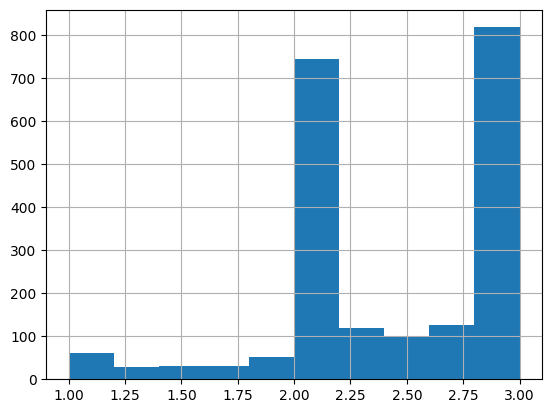

In [26]:
df['FCVC'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x79d13a867310>,
 'caps': [<matplotlib.lines.Line2D at 0x79d13a867850>,
 'boxes': [<matplotlib.lines.Line2D at 0x79d13a867070>],
 'medians': [<matplotlib.lines.Line2D at 0x79d13a867d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x79d13a898070>],
 'means': []}

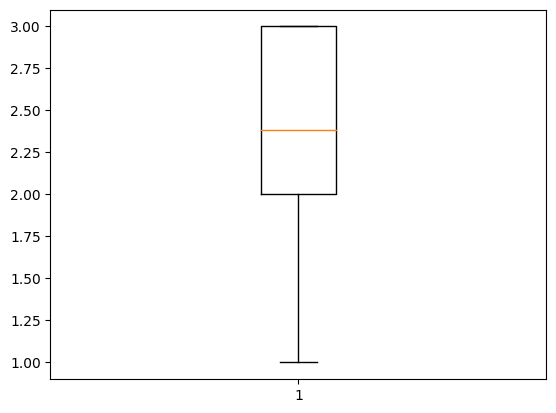

In [27]:
plt.boxplot(x=df['FCVC'])

###**NCP**

Es una variable numérica que determina cantidad de comidas principales se tiene en el día.

*How many main meals do you have daily?*

In [28]:
#Estadísticas de la variable
df['NCP'].describe()

count    2111.000000
mean        2.685628
std         0.778039
min         1.000000
25%         2.658738
50%         3.000000
75%         3.000000
max         4.000000
Name: NCP, dtype: float64

<Axes: >

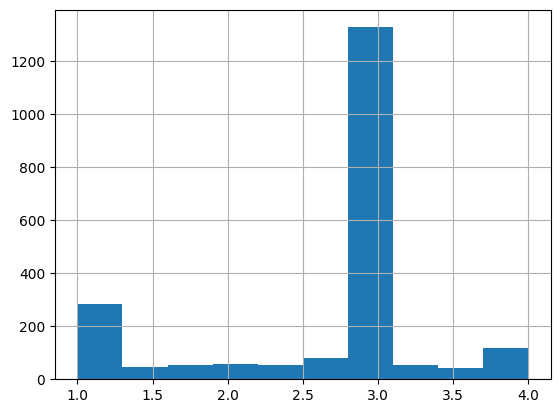

In [29]:
df['NCP'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x79d13a7738b0>,
 'caps': [<matplotlib.lines.Line2D at 0x79d13a773df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79d13a773610>],
 'medians': [<matplotlib.lines.Line2D at 0x79d13a7a4370>],
 'fliers': [<matplotlib.lines.Line2D at 0x79d13a7a4610>],
 'means': []}

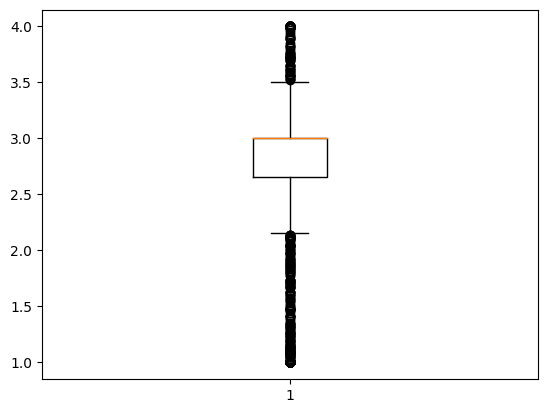

In [30]:
plt.boxplot(x=df['NCP'])

###**CH2O**

Es una variable numérica que determina cantidad de agua que se toma en el día.

*How much water do you drink daily?*

In [31]:
#Estadísticas de la variable
df['CH2O'].describe()

count    2111.000000
mean        2.008011
std         0.612953
min         1.000000
25%         1.584812
50%         2.000000
75%         2.477420
max         3.000000
Name: CH2O, dtype: float64

<Axes: >

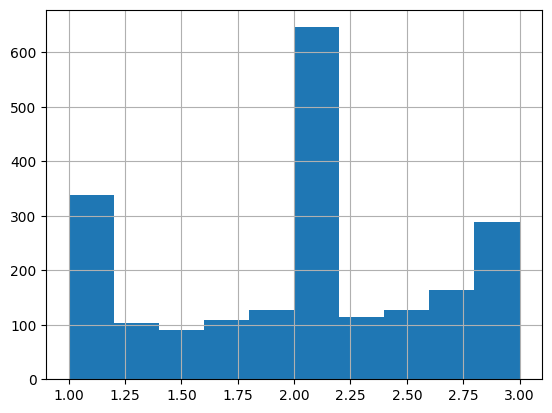

In [32]:
df['CH2O'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x79d13a687ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x79d13a6b0340>,
 'boxes': [<matplotlib.lines.Line2D at 0x79d13a687c40>],
 'medians': [<matplotlib.lines.Line2D at 0x79d13a6b0880>],
 'fliers': [<matplotlib.lines.Line2D at 0x79d13a6b0b20>],
 'means': []}

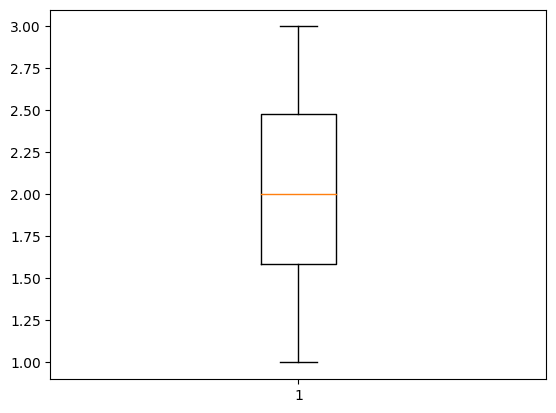

In [33]:
plt.boxplot(x=df['CH2O'])

###**FAF**

Es una variable numérica que determina la frecuencia con la que se realiza actividad física.

*How often do you have physical activity?*

In [34]:
#Estadísticas de la variable
df['FAF'].describe()

count    2111.000000
mean        1.010298
std         0.850592
min         0.000000
25%         0.124505
50%         1.000000
75%         1.666678
max         3.000000
Name: FAF, dtype: float64

<Axes: >

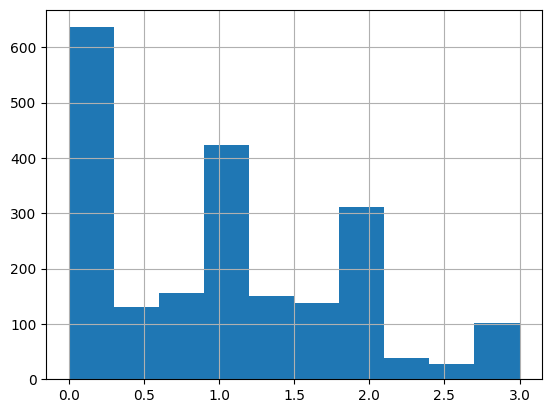

In [35]:
df['FAF'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x79d13a6d7ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x79d13a5c0340>,
 'boxes': [<matplotlib.lines.Line2D at 0x79d13a6d7c40>],
 'medians': [<matplotlib.lines.Line2D at 0x79d13a5c0880>],
 'fliers': [<matplotlib.lines.Line2D at 0x79d13a5c0b20>],
 'means': []}

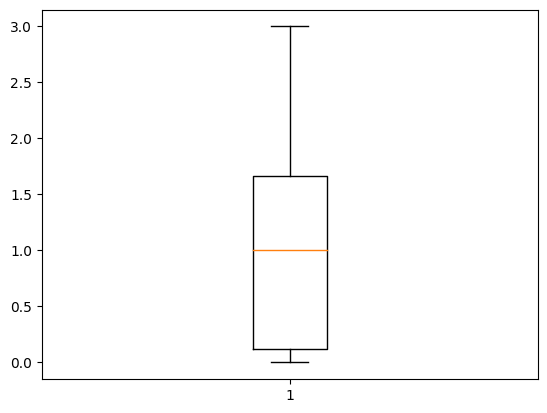

In [36]:
plt.boxplot(x=df['FAF'])

###**TUE**

Es una variable numérica que determina el tiempo que se dedica a actividades tecnológicas como uso del celular, video juegos, televisión, computador y otros.

*How much time do you use technological devices such as cell phone, videogames, television, computer and others?*

In [37]:
#Estadísticas de la variable
df['TUE'].describe()

count    2111.000000
mean        0.657866
std         0.608927
min         0.000000
25%         0.000000
50%         0.625350
75%         1.000000
max         2.000000
Name: TUE, dtype: float64

<Axes: >

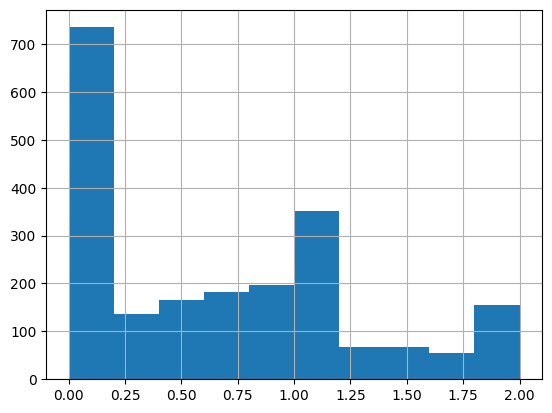

In [38]:
df['TUE'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x79d13a4b4c40>,
 'caps': [<matplotlib.lines.Line2D at 0x79d13a4b5180>,
 'boxes': [<matplotlib.lines.Line2D at 0x79d13a4b49a0>],
 'medians': [<matplotlib.lines.Line2D at 0x79d13a4b56c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79d13a4b5960>],
 'means': []}

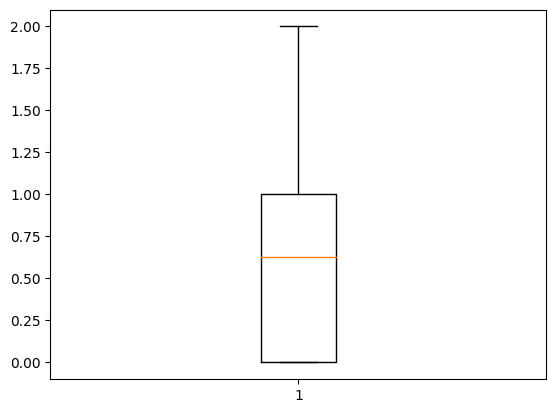

In [39]:
plt.boxplot(x=df['TUE'])

## **Variables categóricas**

### **Gender**
Es una variable categórica que describe el sexo de la persona

In [40]:
#Categorías de la variable
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [41]:
df['Gender'].value_counts()

Gender
Male      1068
Female    1043
Name: count, dtype: int64

<Axes: xlabel='Gender'>

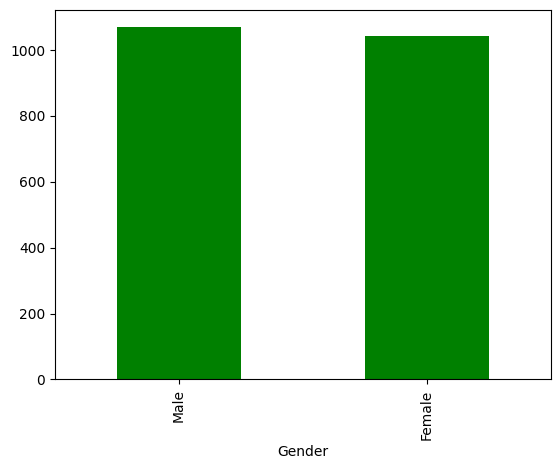

In [42]:
df['Gender'].value_counts().plot(kind='bar', color='green')

### **family_history_with_overweight**
Es una variable categórica que describe si la persona ha tenido familiares con sobrepeso

In [43]:
#Categorías de la variable
df['family_history_with_overweight'].unique()

array(['yes', 'no'], dtype=object)

In [44]:
df['family_history_with_overweight'].value_counts()

family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64

<Axes: xlabel='family_history_with_overweight'>

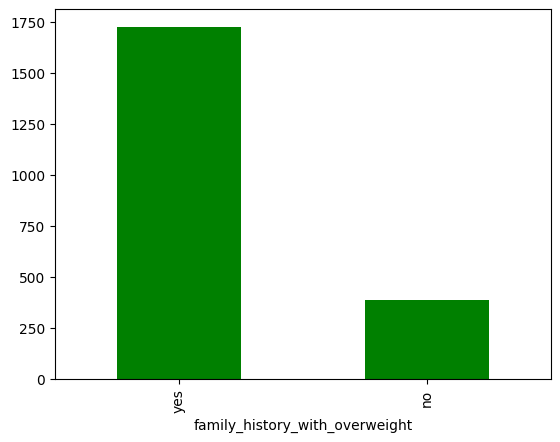

In [45]:
df['family_history_with_overweight'].value_counts().plot(kind='bar',color='green')

### **FAVC**
Es una variable categórica que describe si la persona consume frecuentemente alimentos de alto contenido calórico.

*Do you eat high caloric food frequently?*

In [46]:
#Categorías de la variable
df['FAVC'].unique()

array(['no', 'yes'], dtype=object)

In [47]:
df['FAVC'].value_counts()

FAVC
yes    1866
no      245
Name: count, dtype: int64

<Axes: xlabel='FAVC'>

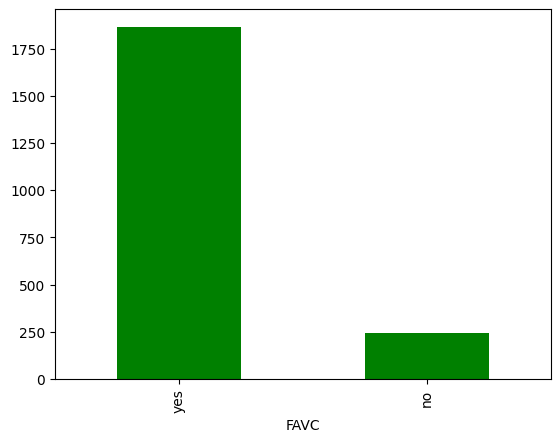

In [48]:
df['FAVC'].value_counts().plot(kind='bar',color='green')

### **CAEC**
Es una variable categórica que describe si la persona consume frecuentemente alimentos entre comidas.

*Do you eat any food between meals?*

In [49]:
#Categorías de la variable
df['CAEC'].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [50]:
df['CAEC'].value_counts()

CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

<Axes: xlabel='CAEC'>

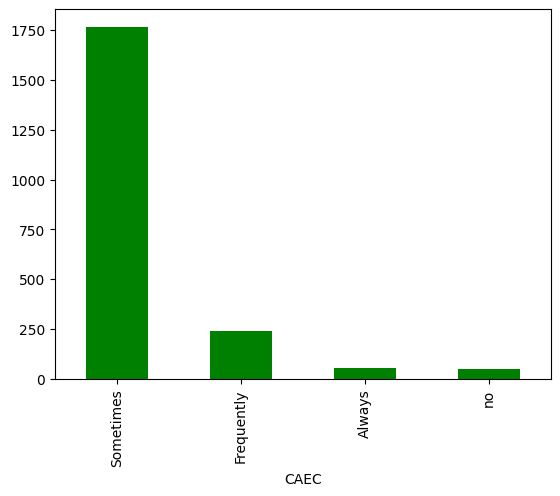

In [51]:
df['CAEC'].value_counts().plot(kind='bar',color='green')

### **SMOKE**
Es una variable categórica que describe si la persona fuma.

*Do you eat any food between meals?*

In [52]:
#Categorías de la variable
df['SMOKE'].unique()

array(['no', 'yes'], dtype=object)

In [53]:
df['SMOKE'].value_counts()

SMOKE
no     2067
yes      44
Name: count, dtype: int64

<Axes: xlabel='SMOKE'>

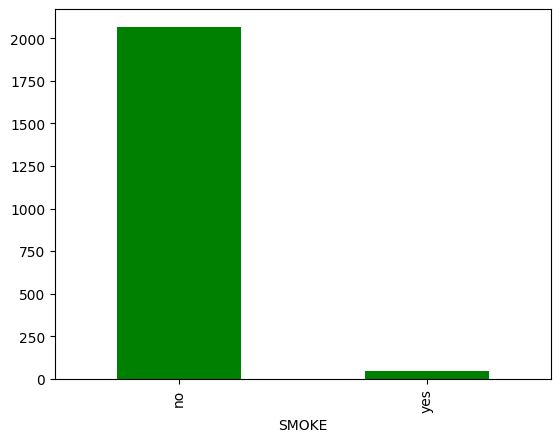

In [54]:
df['SMOKE'].value_counts().plot(kind='bar',color='green')

### **CALC**
Es una variable categórica que describe la frecuencia de consumo de alcohol de la persona.

*How often do you drink alcohol?*

In [55]:
#Categorías de la variable
df['CALC'].unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [56]:
df['CALC'].value_counts()

CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

<Axes: xlabel='CALC'>

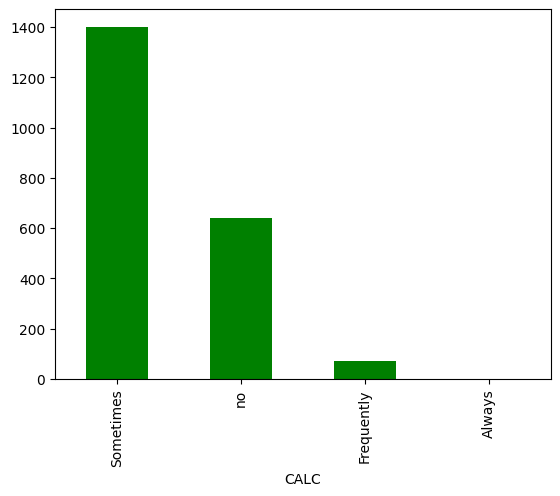

In [57]:
df['CALC'].value_counts().plot(kind='bar',color='green')

### **MTRANS**
Es una variable categórica que describe el medio de transporte usado frecuentemente por la persona.

*Which transportation do you usually use?*

In [58]:
#Categorías de la variable
df['MTRANS'].unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [59]:
df['MTRANS'].value_counts()

MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

<Axes: xlabel='MTRANS'>

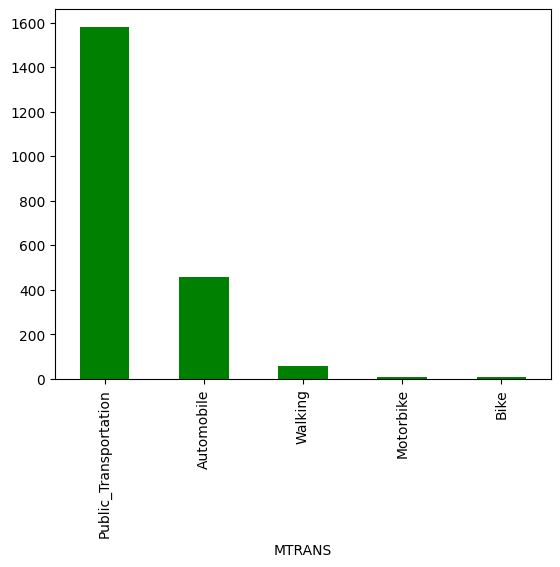

In [60]:
df['MTRANS'].value_counts().plot(kind='bar',color='green')

###**Obesity**

Es una variable categórica que el nivel de obesidad.

*Obesity level

In [61]:
#Estadísticas de la variable
df['Obesity'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [62]:
df['Obesity'].value_counts()

Obesity
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

<Axes: xlabel='Obesity'>

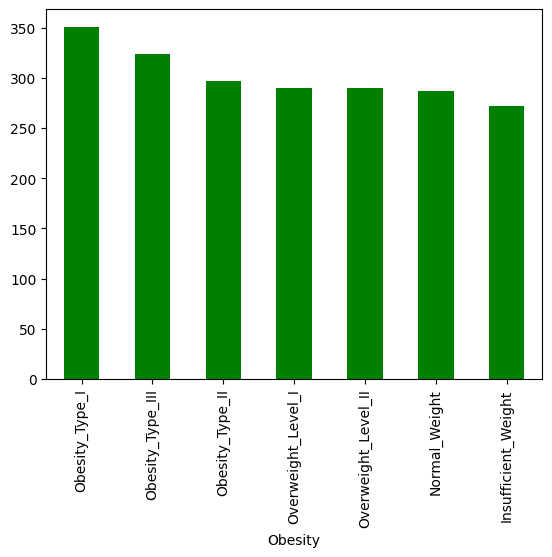

In [63]:
df['Obesity'].value_counts().plot(kind='bar',color='green')

In [64]:
clases=df['Obesity'].unique()
clases

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

---
# **Preparación de los datos**
---

Se preparan los datos para ser usados en los modelos.  Las categorías de cada una de las variables se convierten en números que faciliten el procesamiento.

## **Conversión de variables categóricas**

In [65]:
df.Gender.replace(('Female','Male'),(1,2), inplace=True)
df.family_history_with_overweight.replace(('yes','no'),(1,2), inplace=True)
df.FAVC.replace(('yes','no'),(1,2), inplace=True)
df.CAEC.replace(('Sometimes', 'Frequently', 'Always', 'no'),(1,2,3,4), inplace=True)
df.SMOKE.replace(('yes','no'),(1,2), inplace=True)
df.SCC.replace(('yes','no'),(1,2), inplace=True)
df.CALC.replace(('Sometimes', 'Frequently', 'Always', 'no'),(1,2,3,4), inplace=True)
df.MTRANS.replace(('Public_Transportation', 'Walking', 'Automobile', 'Motorbike','Bike'),(1,2,3,4,5), inplace=True)
df['Obesity'].replace(('Insufficient_Weight','Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II','Obesity_Type_III'),(1,2,3,4,5,6,7), inplace=True)
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Obesity
0,1,21.000000,1.620000,64.000000,1,2,2.0,3.0,1,2,2.000000,2,0.000000,1.000000,4,1,NaN,2
1,1,21.000000,1.520000,56.000000,1,2,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,1,NaN,2
2,2,23.000000,1.800000,77.000000,1,2,2.0,3.0,1,2,2.000000,2,2.000000,1.000000,2,1,NaN,2
3,2,27.000000,1.800000,87.000000,2,2,3.0,3.0,1,2,2.000000,2,2.000000,0.000000,2,2,NaN,3
4,2,22.000000,1.780000,89.800000,2,2,2.0,1.0,1,2,2.000000,2,0.000000,0.000000,1,1,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,2,1.728139,2,1.676269,0.906247,1,1,NaN,7
2107,1,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,2,2.005130,2,1.341390,0.599270,1,1,NaN,7
2108,1,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,2,2.054193,2,1.414209,0.646288,1,1,NaN,7
2109,1,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,2,2.852339,2,1.139107,0.586035,1,1,NaN,7


## **Separación de los conjuntos de características y variable objetivo**

In [66]:
variables= ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE','CALC', 'MTRANS']
variables

['Gender',
 'Age',
 'Height',
 'Weight',
 'family_history_with_overweight',
 'FAVC',
 'FCVC',
 'NCP',
 'CAEC',
 'SMOKE',
 'CH2O',
 'SCC',
 'FAF',
 'TUE',
 'CALC',
 'MTRANS']

In [67]:
X = df[variables]
X

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1,21.000000,1.620000,64.000000,1,2,2.0,3.0,1,2,2.000000,2,0.000000,1.000000,4,1
1,1,21.000000,1.520000,56.000000,1,2,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,1
2,2,23.000000,1.800000,77.000000,1,2,2.0,3.0,1,2,2.000000,2,2.000000,1.000000,2,1
3,2,27.000000,1.800000,87.000000,2,2,3.0,3.0,1,2,2.000000,2,2.000000,0.000000,2,2
4,2,22.000000,1.780000,89.800000,2,2,2.0,1.0,1,2,2.000000,2,0.000000,0.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,2,1.728139,2,1.676269,0.906247,1,1
2107,1,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,2,2.005130,2,1.341390,0.599270,1,1
2108,1,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,2,2.054193,2,1.414209,0.646288,1,1
2109,1,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,2,2.852339,2,1.139107,0.586035,1,1


In [68]:
y = df['Obesity']
y

0       2
1       2
2       2
3       3
4       4
       ..
2106    7
2107    7
2108    7
2109    7
2110    7
Name: Obesity, Length: 2111, dtype: int64

## **Normalización de los datos**

In [69]:
scaler= MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [70]:
X_scaled=scaler.transform(X)
X_scaled

array([[0.        , 0.14893617, 0.32075472, ..., 0.5       , 1.        ,
        0.        ],
       [0.        , 0.14893617, 0.13207547, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.19148936, 0.66037736, ..., 0.5       , 0.33333333,
        0.        ],
       ...,
       [0.        , 0.18136247, 0.5702    , ..., 0.323144  , 0.        ,
        0.        ],
       [0.        , 0.22046672, 0.54613208, ..., 0.2930175 , 0.        ,
        0.        ],
       [0.        , 0.20563211, 0.54497358, ..., 0.3570685 , 0.        ,
        0.        ]])

---
# **Partición de la base de datos**
---

Se distribuyen los datos de la base de datos entre datos de entrenamiento y datos de prueba, para ser usados posteriormente en los diferentes modelos

In [71]:
# Dividir los datos en conjuntos de entrenamiento y prueba (por ejemplo, 70% para entrenamiento, 30% para prueba)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

# **Modelos de aprendizaje supervisado**

En la era de la información y la tecnología, el aprendizaje automático (Machine Learning) se ha convertido en una herramienta esencial para extraer valor de grandes volúmenes de datos. El aprendizaje supervisado, una de las técnicas más prominentes dentro del aprendizaje automático, permite a las máquinas aprender de ejemplos etiquetados para realizar predicciones precisas y tomar decisiones informadas. Este trabajo se centra en la aplicación de modelos de aprendizaje supervisado, explorando su capacidad para resolver problemas complejos en diversas disciplinas.

---
## **Modelo de Regresión Logística**
---

Se debe establecer y resolver el modelo de regresión logística que determine la ecuación representativa de la situación

In [72]:
# Crear el modelo de regresión lineal
lr = LogisticRegression()

# Entrenar el modelo con los datos de entrenamiento
lr.fit(X_train, y_train)
score_train=lr.score(X_train, y_train)
int_log=lr.intercept_[0]
coe_log=lr.coef_[0]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


---
### **Evaluación del modelo**
---

In [73]:
# Realizar predicciones sobre los datos de prueba
y_pred_lr = lr.predict(X_test)

In [74]:
score_test=lr.score(X_test, y_test)
print("Score datos de entrenamiento:", score_train)
print("Score datos de prueba       :", score_test)

Score datos de entrenamiento: 0.7325660121868652
Score datos de prueba       : 0.7334384858044164


Los resultados muestran que el modelo tiene una precisión del 73.26% en el conjunto de entrenamiento y del 73.34% en el conjunto de prueba, lo que indica un buen equilibrio entre ambos conjuntos y sugiere que el modelo no está sobreajustado.

### __Métricas de desempeño__

Así mismo se pueden calcular las métricas de desempeño de este modelo

In [75]:
print(classification_report(y_test, y_pred_lr, target_names=clases))

                     precision    recall  f1-score   support

      Normal_Weight       0.76      0.91      0.83        90
 Overweight_Level_I       0.59      0.38      0.46        87
Overweight_Level_II       0.63      0.59      0.61        81
     Obesity_Type_I       0.54      0.35      0.43        82
Insufficient_Weight       0.69      0.81      0.74       103
    Obesity_Type_II       0.82      0.99      0.89        90
   Obesity_Type_III       0.92      1.00      0.96       101

           accuracy                           0.73       634
          macro avg       0.71      0.72      0.70       634
       weighted avg       0.71      0.73      0.71       634



In [76]:
lrp, lrr, lrs, lru =precision_recall_fscore_support(y_test, y_pred_lr, average= 'macro')
lr_metricas=['Regresión logística', lrp, lrr, lrs]
lr_metricas

['Regresión logística',
 0.7054009929747542,
 0.7187695309605703,
 0.702949515450558]

### __Matriz de confusión__
Para evaluar el modelo lo primero es generar la matriz de confusión

In [77]:
lr_cm = confusion_matrix(y_test , y_pred_lr)
print ("Confusion Matrix: \n", lr_cm)

Confusion Matrix: 
 [[ 82   8   0   0   0   0   0]
 [ 25  33  16  12   1   0   0]
 [  1  11  48   9   7   2   3]
 [  0   4   9  29  30   8   2]
 [  0   0   3   3  83  10   4]
 [  0   0   0   1   0  89   0]
 [  0   0   0   0   0   0 101]]


Y mostrado de forma gráfica sería:

Text(0.5, 1.0, 'Matriz de confusión - Regresión Logística')

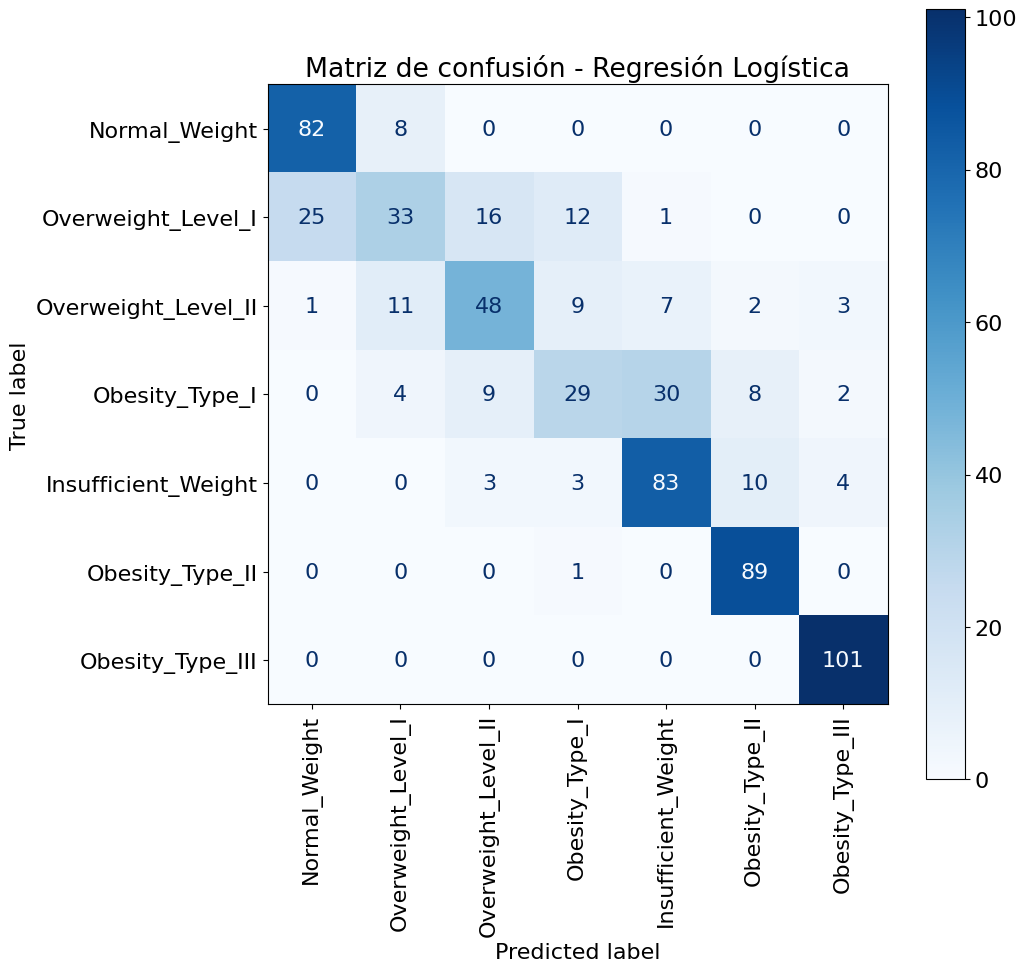

In [78]:
plt.rcParams.update({'font.size': 16})
fig, axes = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay.from_estimator(lr,
                                             X_test,
                                             y_test,
                                             display_labels=clases,
                                             cmap=plt.cm.Blues,
                                             ax=axes,
                                             xticks_rotation='vertical'
                                             )
disp.ax_.set_title('Matriz de confusión - Regresión Logística')

## **Árbol de decisión**

In [79]:
# Crear el modelo de regresión lineal
dt = DecisionTreeClassifier(max_depth = 7,random_state = 48)

# Entrenar el modelo con los datos de entrenamiento
dt.fit(X_train, y_train)
score_train=dt.score(X_train, y_train)
score_train

0.9553148273527421

---
### **Evaluación del modelo**
---

In [80]:
# Realizar predicciones sobre los datos de prueba
y_pred_dt = dt.predict(X_test)

In [81]:
score_test=dt.score(X_test, y_test)
print("Score datos de entrenamiento:", score_train)
print("Score datos de prueba       :", score_test)

Score datos de entrenamiento: 0.9553148273527421
Score datos de prueba       : 0.9053627760252366


Se ha aplicado un modelo de árbol de decisión para predecir los niveles de obesidad basados en hábitos alimenticios y condiciones físicas. El modelo mostró una precisión del 95.53% en el conjunto de entrenamiento y del 90.54% en el conjunto de prueba, lo que indica un alto rendimiento pero también un posible sobreajuste.

### __Métricas de desempeño__

Así mismo se pueden calcular las métricas de desempeño de este modelo

In [82]:
print(classification_report(y_test, y_pred_dt, target_names=clases))

                     precision    recall  f1-score   support

      Normal_Weight       0.94      0.97      0.95        90
 Overweight_Level_I       0.83      0.84      0.83        87
Overweight_Level_II       0.79      0.73      0.76        81
     Obesity_Type_I       0.83      0.84      0.84        82
Insufficient_Weight       0.94      0.95      0.95       103
    Obesity_Type_II       0.97      0.98      0.97        90
   Obesity_Type_III       1.00      0.99      1.00       101

           accuracy                           0.91       634
          macro avg       0.90      0.90      0.90       634
       weighted avg       0.90      0.91      0.90       634



In [83]:
dtp, dtr, dts, dtu =precision_recall_fscore_support(y_test, y_pred_dt, average= 'macro')
dt_metricas=['Árbol de decisión', dtp, dtr, dts]
dt_metricas

['Árbol de decisión',
 0.8989088503893345,
 0.8992769573082432,
 0.8988771069717175]

### __Matriz de confusión__
Para evaluar el modelo lo primero es generar la matriz de confusión

In [84]:
dt_cm = confusion_matrix(y_test , y_pred_dt)
print ("Confusion Matrix: \n", dt_cm)

Confusion Matrix: 
 [[ 87   3   0   0   0   0   0]
 [  6  73   8   0   0   0   0]
 [  0  11  59  11   0   0   0]
 [  0   1   8  69   4   0   0]
 [  0   0   0   3  98   2   0]
 [  0   0   0   0   2  88   0]
 [  0   0   0   0   0   1 100]]


Y mostrado de forma gráfica sería:

Text(0.5, 1.0, 'Matriz de confusión - Arbol de decisión')

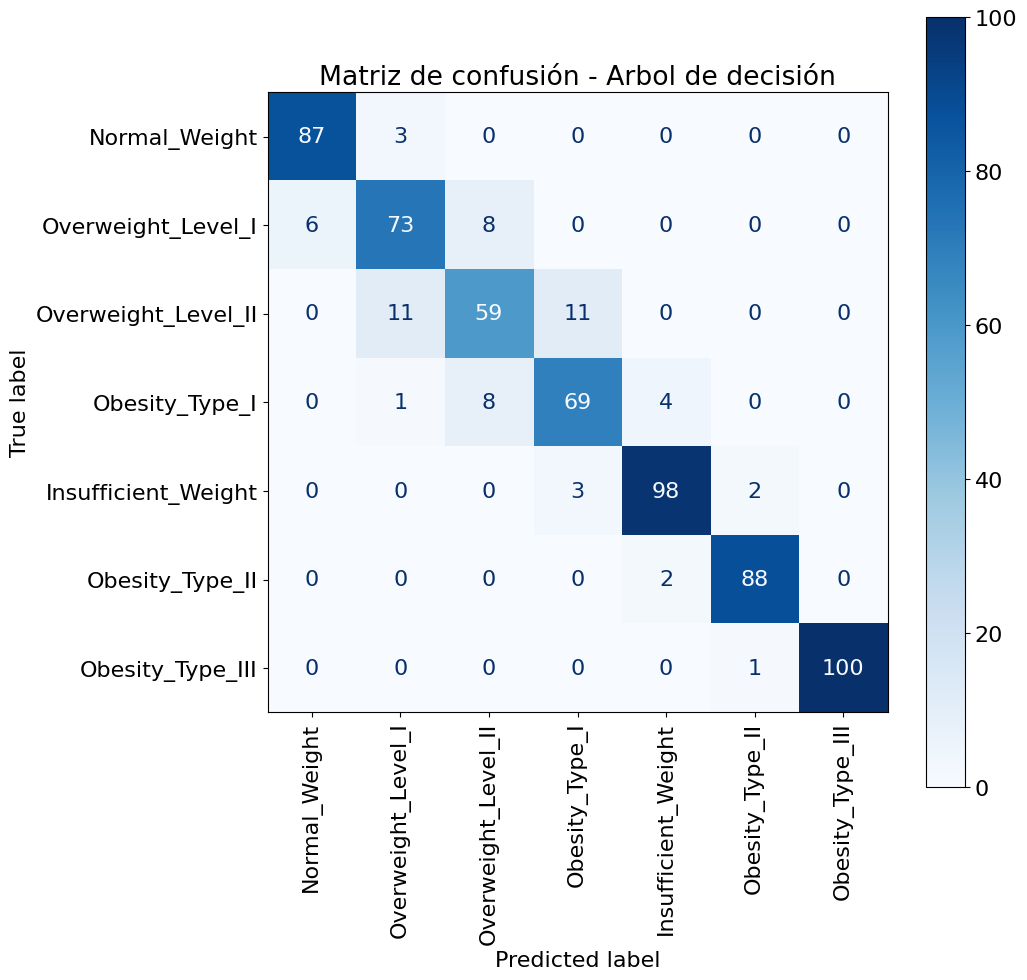

In [85]:
plt.rcParams.update({'font.size': 16})
fig, axes = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay.from_estimator(dt,
                                             X_test,
                                             y_test,
                                             display_labels=clases,
                                             cmap=plt.cm.Blues,
                                             ax=axes,
                                             xticks_rotation='vertical'
                                             )
disp.ax_.set_title('Matriz de confusión - Arbol de decisión')

---
## **Random Forest**
---

In [86]:
# Crear el modelo de regresión lineal
rf = RandomForestClassifier(max_depth = 7,random_state = 48)

# Entrenar el modelo con los datos de entrenamiento
rf.fit(X_train, y_train)
score_train=rf.score(X_train, y_train)
score_train

0.980365605958023

---
### **Evaluación del modelo**
---

In [87]:
# Realizar predicciones sobre los datos de prueba
y_pred_rf = rf.predict(X_test)

In [88]:
score_test=rf.score(X_test, y_test)
print("Score datos de entrenamiento:", score_train)
print("Score datos de prueba       :", score_test)

Score datos de entrenamiento: 0.980365605958023
Score datos de prueba       : 0.9463722397476341


Se ha aplicado un modelo de Random Forest para predecir los niveles de obesidad basados en hábitos alimenticios y condiciones físicas. El modelo mostró una precisión del 98.04% en el conjunto de entrenamiento y del 94.64% en el conjunto de prueba, indicando un rendimiento muy bueno.

### __Matriz de confusión__
Para evaluar el modelo lo primero es generar la matriz de confusión

In [90]:
rf_cm = confusion_matrix(y_test , y_pred_rf)
print ("Confusion Matrix: \n", rf_cm)

Confusion Matrix: 
 [[ 86   4   0   0   0   0   0]
 [  2  84   1   0   0   0   0]
 [  0   7  69   4   1   0   0]
 [  0   4   3  69   6   0   0]
 [  0   1   0   0 102   0   0]
 [  0   0   0   0   1  89   0]
 [  0   0   0   0   0   0 101]]


Y mostrado de forma gráfica sería:

Text(0.5, 1.0, 'Matriz de Confusión - Random Forest')

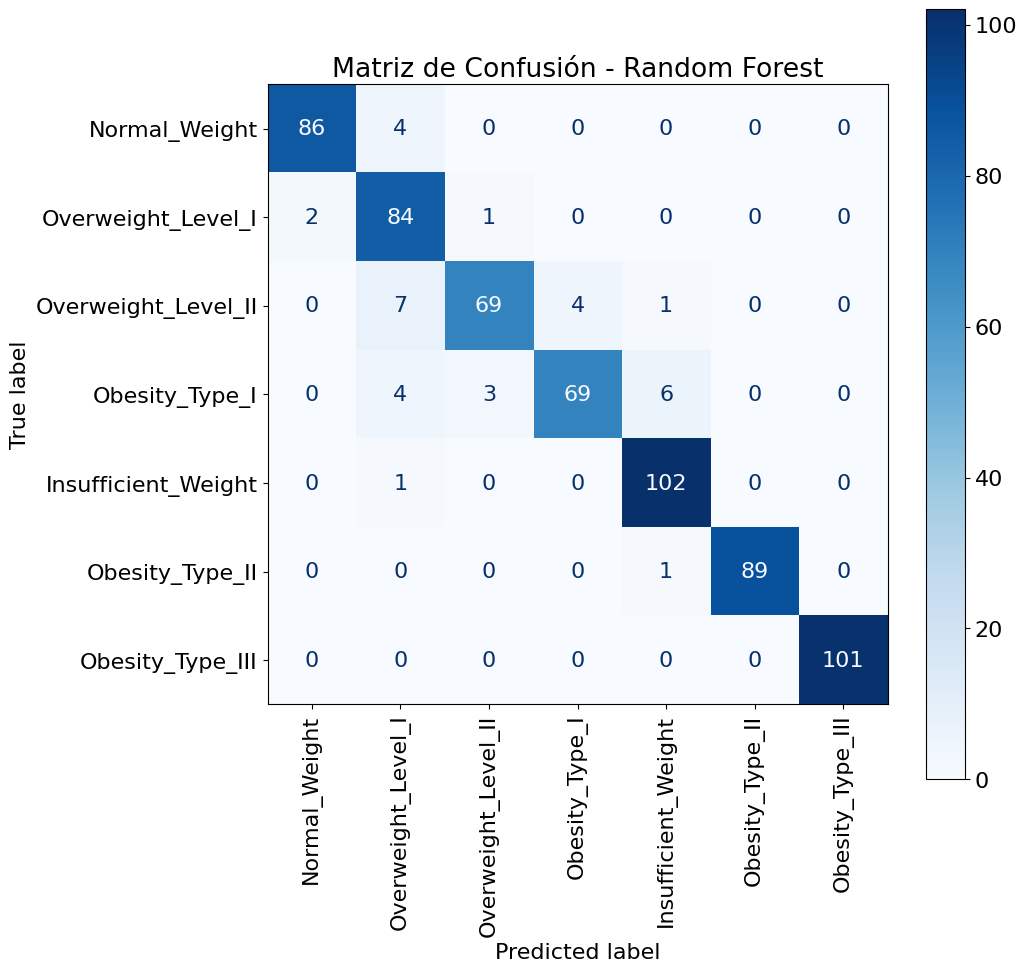

In [91]:
plt.rcParams.update({'font.size': 16})
fig, axes = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay.from_estimator(rf,
                                             X_test,
                                             y_test,
                                             display_labels=clases,
                                             cmap=plt.cm.Blues,
                                             ax=axes,
                                             xticks_rotation='vertical'
                                             )
disp.ax_.set_title('Matriz de Confusión - Random Forest')

### __Métricas de desempeño__

Así mismo se pueden calcular las métricas de desempeño de este modelo

In [92]:
print(classification_report(y_test, y_pred_rf, target_names=clases))

                     precision    recall  f1-score   support

      Normal_Weight       0.98      0.96      0.97        90
 Overweight_Level_I       0.84      0.97      0.90        87
Overweight_Level_II       0.95      0.85      0.90        81
     Obesity_Type_I       0.95      0.84      0.89        82
Insufficient_Weight       0.93      0.99      0.96       103
    Obesity_Type_II       1.00      0.99      0.99        90
   Obesity_Type_III       1.00      1.00      1.00       101

           accuracy                           0.95       634
          macro avg       0.95      0.94      0.94       634
       weighted avg       0.95      0.95      0.95       634



In [93]:
rfp, rfr, rfs, rfu =precision_recall_fscore_support(y_test, y_pred_rf, average= 'macro')
rf_metricas=['Random forest', rfp, rfr, rfs]
rf_metricas

['Random forest', 0.9478509162070805, 0.9419383163493821, 0.9433248886000172]

---
# **Comparación entre modelos**
---

In [94]:
metricas=[lr_metricas, dt_metricas,rf_metricas]
df_metricas=pd.DataFrame(metricas, columns=['Classifier','Precission','Recall', 'F1 Score'])
df_metricas.style.background_gradient()

,Classifier,Precission,Recall,F1 Score
0,Regresión logística,0.705401,0.718770,0.702950
1,Árbol de decisión,0.898909,0.899277,0.898877
2,Random forest,0.947851,0.941938,0.943325


---
# **Conclusiones**
---

- Regresión Logística
La regresión logística mostró una precisión de 70.54%, un recall de 71.88% y un F1 Score de 70.29%. Este modelo es más adecuado para problemas donde se busca una interpretación clara de las relaciones lineales entre las variables independientes y la variable dependiente. Sin embargo, en este caso, la precisión y la capacidad predictiva del modelo fueron las más bajas entre los tres modelos evaluados, lo que sugiere que las relaciones en los datos pueden ser no lineales y más complejas de lo que este modelo puede capturar.

- Árbol de Decisión
El árbol de decisión presentó mejoras significativas con una precisión de 89.89%, un recall de 89.93% y un F1 Score de 89.89%. Este modelo es útil para capturar relaciones no lineales y es interpretable, lo que facilita la comprensión de las decisiones del modelo. Sin embargo, el rendimiento del árbol de decisión muestra que aunque es un buen modelo, todavía no alcanza la precisión del modelo de Random Forest.

- Random Forest
El modelo de Random Forest tuvo el mejor desempeño con una precisión de 94.79%, un recall de 94.19% y un F1 Score de 94.33%. Este modelo es eficaz para manejar datos de alta dimensionalidad y reducir el sobreajuste mediante la combinación de múltiples árboles de decisión. El Random Forest logró equilibrar la precisión y el recall, proporcionando el rendimiento más robusto y confiable entre los modelos evaluados.

Entre los modelos evaluados, el Random Forest fue el más efectivo para predecir los niveles de obesidad basados en hábitos alimenticios y condiciones físicas, con los valores más altos de precisión, recall y F1 Score. Esto sugiere que para problemas con características complejas y no lineales, los modelos de ensamblado como Random Forest son más adecuados.

Para futuras mejoras, se podría considerar:

- Ajuste de hiperparámetros utilizando técnicas de búsqueda en cuadrícula o búsqueda aleatoria para optimizar aún más el rendimiento del modelo.
- Implementación de técnicas de validación cruzada para asegurar la robustez del modelo.
- Exploración de otros modelos avanzados como Gradient Boosting o XGBoost, que podrían proporcionar mejoras adicionales en el rendimiento predictivo.

En resumen, el uso de Random Forest ha demostrado ser la mejor opción para este conjunto de datos, proporcionando resultados precisos y robustos, y ayudando a identificar de manera efectiva los niveles de obesidad en individuos basándose en sus hábitos alimenticios y condiciones físicas.

---
# **Referencias**
---

Estimation of Obesity Levels Based On Eating

1.   Habits and Physical Condition . (2019). UCI Machine Learning Repository. https://doi.org/10.24432/C5H31Z.


